In [1]:
import pandas as pd
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from warnings import filterwarnings

#this will help ignore warnings
filterwarnings ('ignore')

In [2]:
df_red = pd.read_csv("winequality-red.csv", delimiter=';')
df_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_white = pd.read_csv("winequality-white.csv", delimiter=';')
df_white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df_red[100:110]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
100,8.3,0.610,0.30,2.1,0.084,11.0,50.0,0.9972,3.40,0.61,10.2,6
101,7.8,0.500,0.30,1.9,0.075,8.0,22.0,0.9959,3.31,0.56,10.4,6
102,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.9972,3.30,0.59,9.0,6
103,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,5
104,7.2,0.490,0.24,2.2,0.070,5.0,36.0,0.9960,3.33,0.48,9.4,5
105,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,5
106,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.9973,3.08,1.31,9.3,5
107,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.9969,3.46,0.79,9.3,5
108,8.0,0.330,0.53,2.5,0.091,18.0,80.0,0.9976,3.37,0.80,9.6,6
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.9969,3.21,0.69,9.3,5


In [7]:
df_white[100:110]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
100,7.4,0.250,0.37,13.5,0.060,52.0,192.0,0.9975,3.00,0.44,9.1,5
101,7.1,0.120,0.32,9.6,0.054,64.0,162.0,0.9962,3.40,0.41,9.4,5
102,6.0,0.210,0.24,12.1,0.050,55.0,164.0,0.9970,3.34,0.39,9.4,5
103,7.5,0.305,0.40,18.9,0.059,44.0,170.0,1.0000,2.99,0.46,9.0,5
104,7.4,0.250,0.37,13.5,0.060,52.0,192.0,0.9975,3.00,0.44,9.1,5
105,7.3,0.130,0.32,14.4,0.051,34.0,109.0,0.9974,3.20,0.35,9.2,6
106,7.1,0.120,0.32,9.6,0.054,64.0,162.0,0.9962,3.40,0.41,9.4,5
107,7.1,0.230,0.35,16.5,0.040,60.0,171.0,0.9990,3.16,0.59,9.1,6
108,7.1,0.230,0.35,16.5,0.040,60.0,171.0,0.9990,3.16,0.59,9.1,6
109,6.9,0.330,0.28,1.3,0.051,37.0,187.0,0.9927,3.27,0.60,10.3,5


In [8]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
cormat = df_red.corr()
cormat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


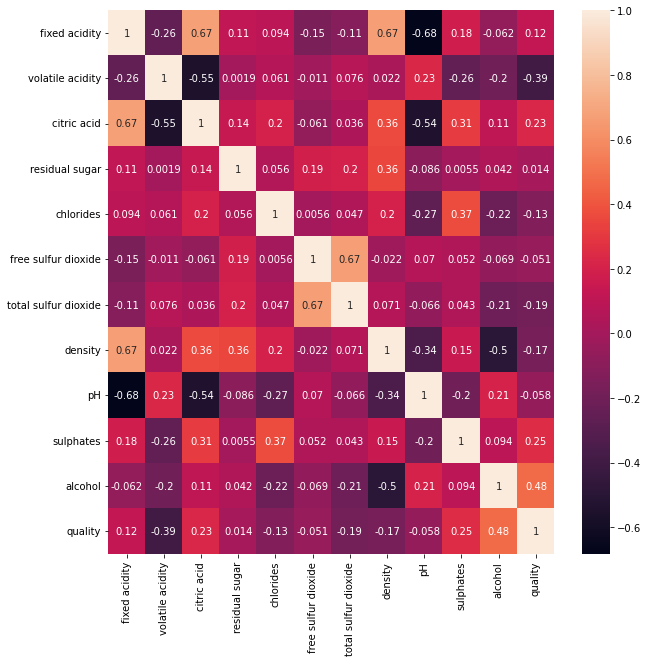

In [15]:
fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(cormat, annot=True)
plt.show()

In [16]:
x = df_red.corr().unstack().sort_values(ascending=False).drop_duplicates()
df = pd.DataFrame(x).reset_index(drop=False)
df.head(10)

,level_0,level_1,0
0,fixed acidity,fixed acidity,1.000000
1,citric acid,fixed acidity,0.671703
2,fixed acidity,density,0.668047
3,free sulfur dioxide,total sulfur dioxide,0.667666
4,quality,alcohol,0.476166
5,sulphates,chlorides,0.371260
6,density,citric acid,0.364947
7,residual sugar,density,0.355283
8,sulphates,citric acid,0.312770
9,quality,sulphates,0.251397


In [17]:
df.tail(10)

,level_0,level_1,0
57,chlorides,alcohol,-0.221141
58,fixed acidity,volatile acidity,-0.256131
59,volatile acidity,sulphates,-0.260987
60,chlorides,pH,-0.265026
61,density,pH,-0.341699
62,quality,volatile acidity,-0.390558
63,density,alcohol,-0.496180
64,citric acid,pH,-0.541904
65,citric acid,volatile acidity,-0.552496
66,fixed acidity,pH,-0.682978


In [18]:
df[df['level_1']=='sulphates']

,level_0,level_1,0
9,quality,sulphates,0.251397
18,density,sulphates,0.148506
24,alcohol,sulphates,0.093595
30,free sulfur dioxide,sulphates,0.051658
32,total sulfur dioxide,sulphates,0.042947
38,residual sugar,sulphates,0.005527
54,pH,sulphates,-0.196648
59,volatile acidity,sulphates,-0.260987


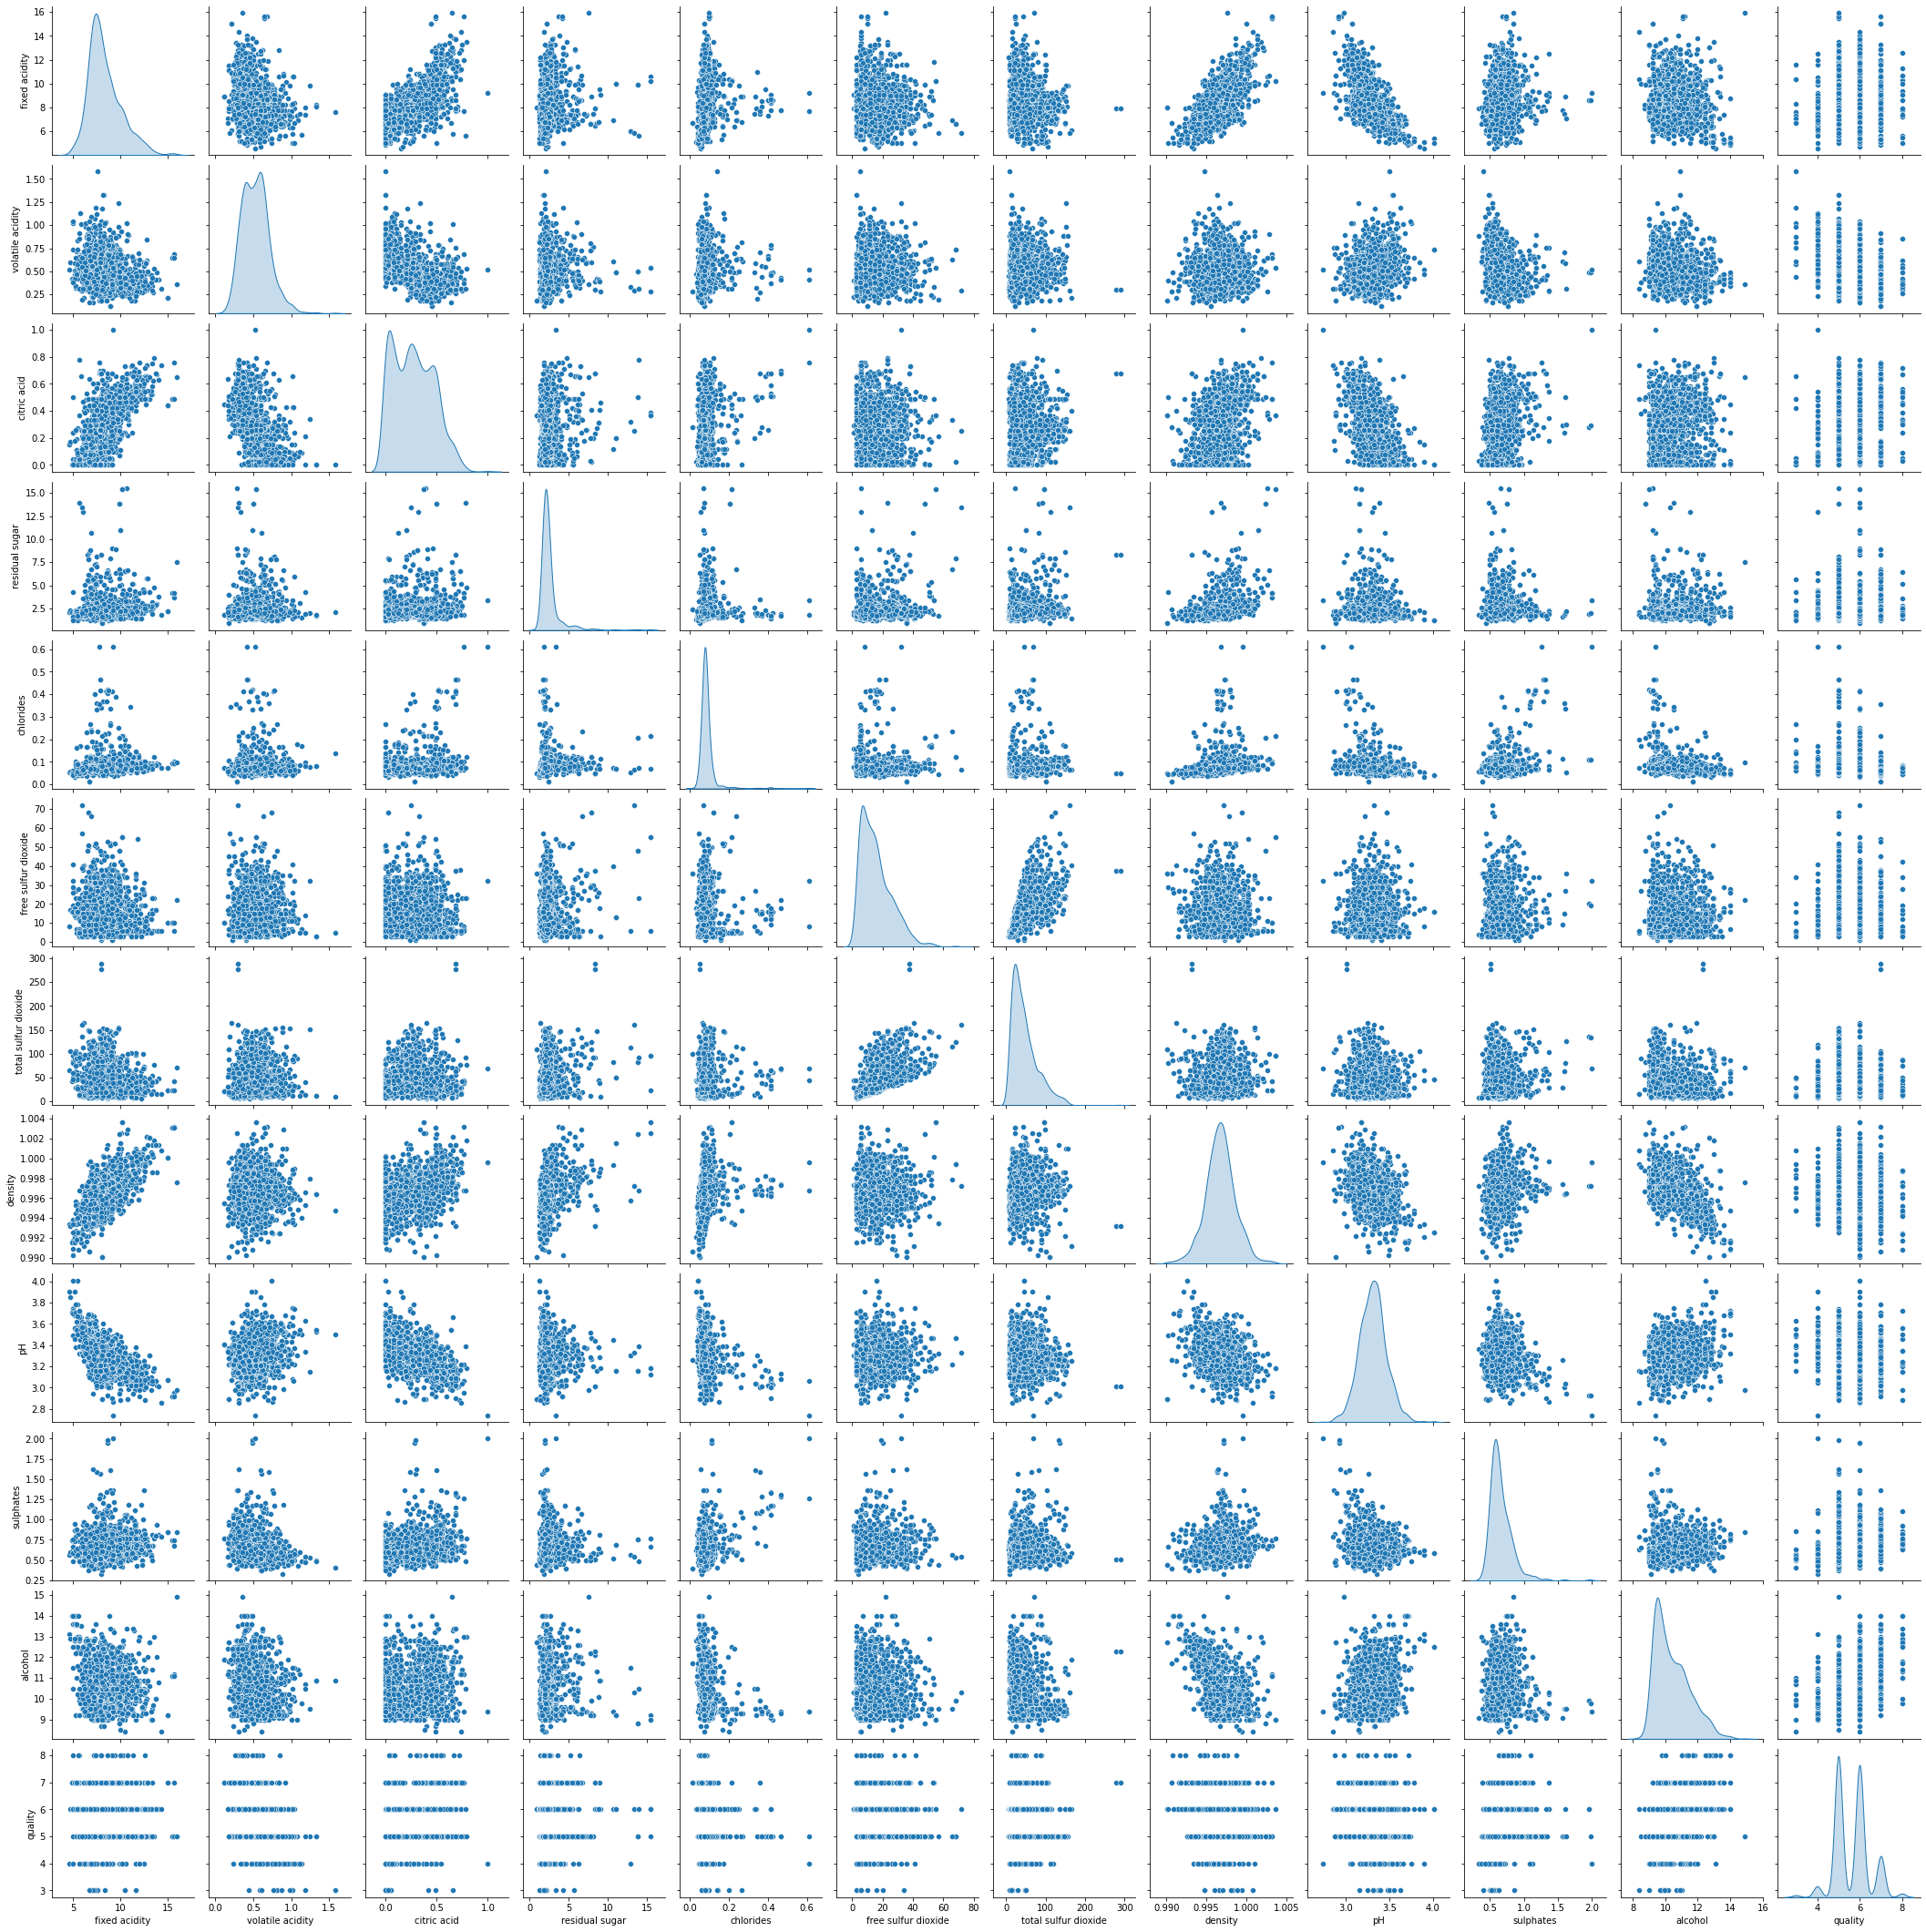

In [19]:
sns.pairplot(df_red, diag_kind='kde')
plt.show()

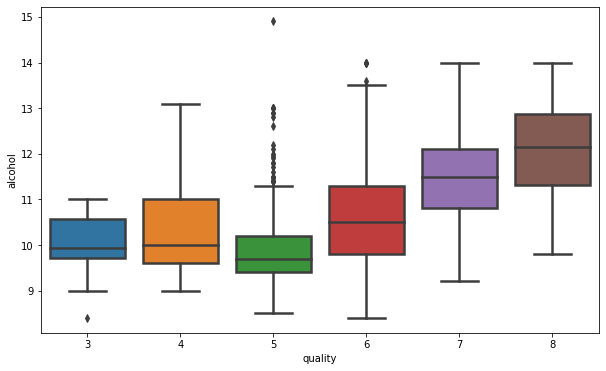

In [20]:
plt.figure(figsize = (10,6))
sns.boxplot(x='quality',y='alcohol',linewidth=2.5,data=df_red)
plt.show()

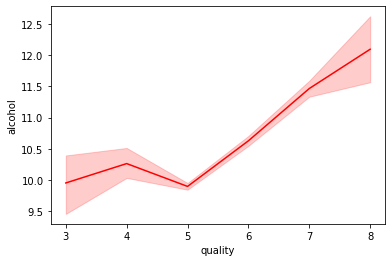

In [21]:
sns.lineplot(data=df_red, x="quality", y="alcohol", color='red')
plt.show()

Text(0.4, 0.1, 'p = 9.96e-17')

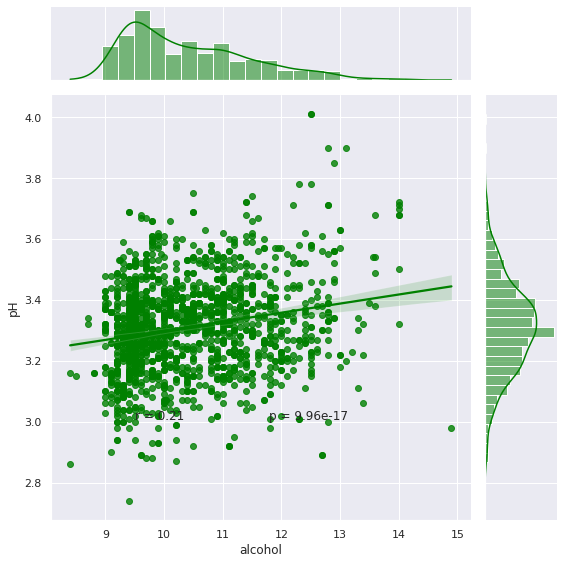

In [22]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('alcohol', 'pH', data = df_red, kind='reg', height=8, color='green')
r, p = stats.pearsonr(df_red['alcohol'], df_red['pH'])

j.ax_joint.annotate('r = {:.2f} '.format(r), xy=(.1, .1), xycoords=ax.transAxes)
j.ax_joint.annotate('p = {:.2e}'.format(p), xy=(.4, .1), xycoords=ax.transAxes)

In [23]:
from scipy.stats import pearsonr

get_correlation, _ = pearsonr(df_red['fixed acidity'], df_red['citric acid'])
print('Pearsons correlation of fixed acidity and citric acid: %.3f' % get_correlation)

Pearsons correlation of fixed acidity and citric acid: 0.672


In [24]:
get_correlation, _ = pearsonr(df_red['alcohol'], df_red['pH'])
print('Pearsons correlation for alcohol and pH: %.3f' % get_correlation)

Pearsons correlation for alcohol and pH: 0.206


In [25]:
df_white = pd.read_csv("winequality-white.csv", delimiter=';')
df_white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
avg = df_red['quality'].mean()
print("Average quality of red wine: %0.2f" % avg)

Average quality of red wine: 5.64


In [27]:
avg = df_white['quality'].mean()
print("Average quality of white wine: %0.2f" % avg)

Average quality of white wine: 5.88


In [28]:
wine_category = 'Red Wine'
df_red['wine_category']=wine_category
df_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red Wine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red Wine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red Wine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red Wine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red Wine


In [29]:
wine_category = 'White Wine'
df_white['wine_category']=wine_category
df_white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White Wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White Wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White Wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White Wine
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White Wine


In [30]:
print("The unique values for red wine: ",df_red['quality'].unique())

The unique values for red wine:  [5 6 7 4 8 3]


In [31]:
print("The unique values for red wine: ",df_white['quality'].unique())

The unique values for red wine:  [6 5 7 8 4 3 9]


In [32]:
category = pd.cut(df_red.quality,bins=[0,5,7,10],labels=['low','medium','high'])
df_red.insert(12,'quality_label',category)


In [33]:
df_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,Red Wine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,Red Wine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,Red Wine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,Red Wine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,Red Wine


In [34]:
category_white = pd.cut(df_white.quality,bins=[0,5,7,10],labels=['low','medium','high'])
df_white.insert(12,'quality_label',category_white)
df_white.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,White Wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,White Wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,White Wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,White Wine
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,White Wine
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,White Wine
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,medium,White Wine
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,White Wine
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,White Wine
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,medium,White Wine


In [35]:
df_red['quality_label'].value_counts()

medium    837
low       744
high       18
Name: quality_label, dtype: int64

In [36]:
df_white['quality_label'].value_counts()

medium    3078
low       1640
high       180
Name: quality_label, dtype: int64

In [37]:
total_data = pd.concat([df_red,df_white])
total_data.shape

(6497, 14)

In [38]:
total_data = total_data.sample(frac=1).reset_index(drop=True)
total_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_category
0,12.7,0.60,0.49,2.80,0.075,5.0,19.0,0.99940,3.14,0.57,11.4,5,low,Red Wine
1,7.4,0.49,0.27,2.10,0.071,14.0,25.0,0.99388,3.35,0.63,12.0,6,medium,Red Wine
2,7.3,0.24,0.39,3.60,0.024,35.0,116.0,0.99280,3.17,0.51,10.9,5,low,White Wine
3,7.3,0.19,0.49,15.55,0.058,50.0,134.0,0.99980,3.42,0.36,9.1,7,medium,White Wine
4,6.7,0.19,0.36,1.10,0.026,63.0,143.0,0.99120,3.27,0.48,11.0,6,medium,White Wine


In [51]:
low_quality_wine=total_data[total_data['quality_label']=='low']

low_quality_wine=low_quality_wine[['alcohol','pH','quality','density','quality_label']]

low_quality_wine

,alcohol,pH,quality,density,quality_label
0,11.4,3.14,5,0.9994,low
2,10.9,3.17,5,0.9928,low
6,10.5,3.14,5,0.9940,low
8,10.6,3.39,5,0.9940,low
12,10.3,3.60,5,0.9960,low
...,...,...,...,...,...
6483,8.6,3.05,5,0.9942,low
6487,10.0,3.06,4,0.9977,low
6491,9.8,3.14,5,0.9920,low
6492,9.3,3.32,5,0.9932,low


In [52]:
medium_quality_wine=total_data[total_data['quality_label']=='medium']

medium_quality_wine=medium_quality_wine[['alcohol','pH','quality','density','quality_label']]

medium_quality_wine

,alcohol,pH,quality,density,quality_label
1,12.0,3.35,6,0.99388,medium
3,9.1,3.42,7,0.99980,medium
4,11.0,3.27,6,0.99120,medium
5,10.8,3.17,6,0.99280,medium
7,9.4,3.11,6,0.99370,medium
...,...,...,...,...,...
6489,10.3,3.55,6,0.99180,medium
6490,10.9,3.16,7,0.99240,medium
6493,12.9,3.11,6,0.99036,medium
6494,11.4,3.32,6,0.99103,medium


In [53]:
high_quality_wine=total_data[total_data['quality_label']=='high']

high_quality_wine=high_quality_wine[['alcohol','pH','quality','density','quality_label']]

high_quality_wine

,alcohol,pH,quality,density,quality_label
34,13.4,3.04,8,0.98934,high
126,12.2,3.26,8,0.99420,high
144,12.5,3.06,8,0.99228,high
185,11.9,3.25,8,0.99085,high
215,13.0,3.56,8,0.98942,high
...,...,...,...,...,...
6445,10.4,3.20,9,0.99700,high
6452,11.2,3.55,8,0.99200,high
6456,11.3,3.04,8,0.99189,high
6467,8.9,3.14,8,0.99900,high


In [54]:
quality_label_wine=pd.concat([low_quality_wine, medium_quality_wine,high_quality_wine])
quality_label_wine

,alcohol,pH,quality,density,quality_label
0,11.4,3.14,5,0.99940,low
2,10.9,3.17,5,0.99280,low
6,10.5,3.14,5,0.99400,low
8,10.6,3.39,5,0.99400,low
12,10.3,3.60,5,0.99600,low
...,...,...,...,...,...
6445,10.4,3.20,9,0.99700,high
6452,11.2,3.55,8,0.99200,high
6456,11.3,3.04,8,0.99189,high
6467,8.9,3.14,8,0.99900,high


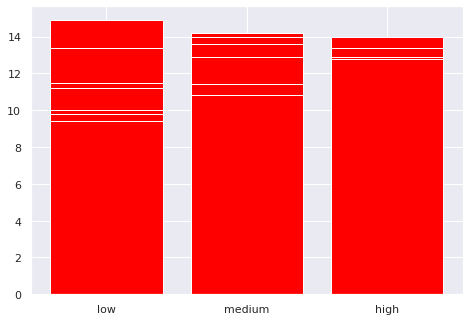

In [59]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(quality_label_wine['quality_label'], quality_label_wine['alcohol'], color='red')
plt.show()

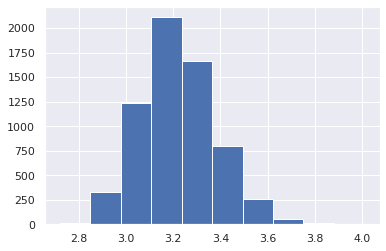

In [60]:
fig, ax = plt.subplots(1,1)
plt.hist(quality_label_wine['pH'])
plt.show()

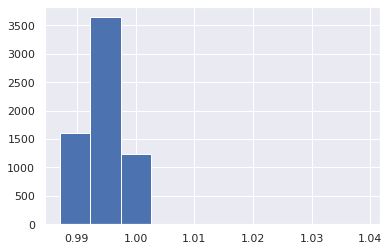

In [61]:
fig, ax = plt.subplots(1,1)
plt.hist(quality_label_wine['density'])
plt.show()

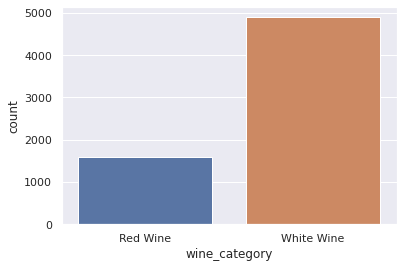

In [41]:
sns.countplot(x="wine_category",  data=total_data)
plt.show()

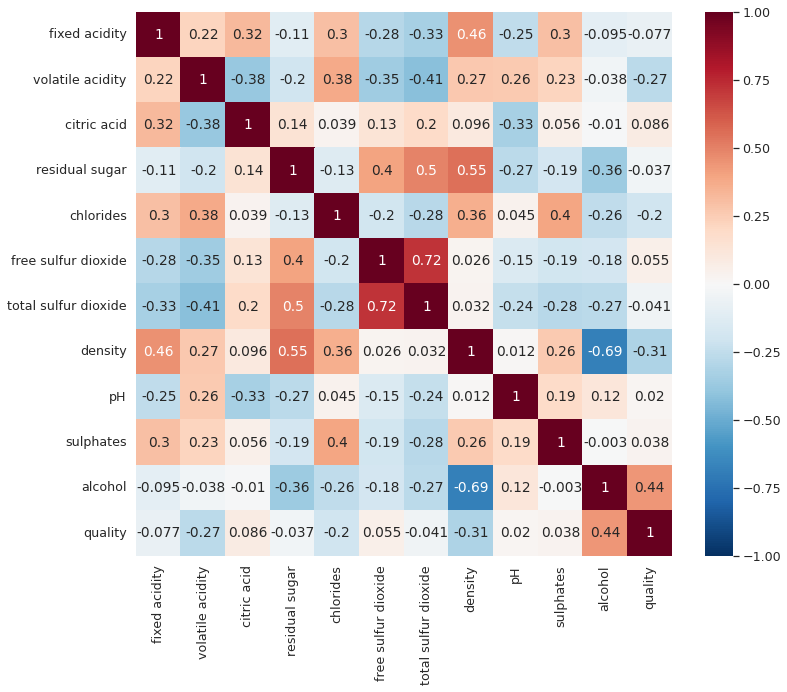

In [74]:
sns.set(font_scale=1.15)
plt.figure(figsize=(12,10))
sns.heatmap(
    total_data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);
plt.show()